# Optical Communication project - Group 11

The parameters are given by:
1. The refractive index of the core $n_1 = 1.52$.
2. The refractive index of the cladding $n_2 = 1.49$.
3. The radius of the core is $a = 3 \times 10^{-6}$ m.
4. The wavelength is $\lambda = 810 \times 10^{-9}$ m.

In the following, this project is divided into 8 tasks for demonstration.

## 1. Calculate the V-parameter for the fibre.

The V-parameter is calculated by $$V=ak_0\sqrt{(n_1^2-n_2^2)}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import special
from scipy.special import jv
from scipy.special import yv
from scipy.special import kv
from scipy.optimize import leastsq
import math

n_1 = 1.52              # Refractive index of the core, no unit
n_2 = 1.49              # Refractive index of the cladding, no unit
a = 3e-6                # Radius of the core, unit is [m]
lamda = 810e-9          # Wavelength, unit is [m]
k0 = 2 * np.pi / lamda  # Wave number in vacuum, unit is [m^-1]
V = (2 * np.pi * a) / lamda * (n_1**2 - n_2**2)**(1/2)  # V-parameter, unit is [m^-1]
print('The wave number in vacuum k0 = %.4f'%k0)
print('The V-parameter V = %.4f'%V)

The wave number in vacuum k0 = 7757018.8978
The V-parameter V = 6.9929


## 2. Decide to consider the {TE, TM, EH, HE} modes for all of the subsequent tasks.

## 3.(a) Identify all the modes that the fibre supports and the propagation constant and effective index for each mode.

According to the theory, for TE modes (m=0) and EH modes (m>0) $$\frac{J_{m+1}(pa)}{paJ_m(pa)}=-\frac{K_{m+1}(qa)}{paK_m(qa)}=-\frac{K_{m+1}(\sqrt{V^2-(pa)^2})}{\sqrt{V^2-(pa)^2}K_m(\sqrt{V^2-(pa)^2})}$$

and for TM modes (m=0) and HE modes (m>0) $$\frac{J_{m-1}(pa)}{paJ_m(pa)}=\frac{K_{m-1}(qa)}{paK_m(qa)}=\frac{K_{m-1}(\sqrt{V^2-(pa)^2})}{\sqrt{V^2-(pa)^2}K_m(\sqrt{V^2-(pa)^2})}$$

In the following code, the left hand side and right hand side function are set as $${\rm LHS}={\rm f1}=\frac{J_{m-sign}(x)}{xJ_{m}(x)}$$


$${\rm RHS}={\rm f2}=sign\frac{K_{m-sign}(\sqrt{V^2-x^2})}{\sqrt{V^2-x^2}J_{m}(\sqrt{V^2-x^2})}$$

where the sign = -1 is for TE and EH modes, and sign = 1 is for TM and HE modes.

**In the following, for each m, the intersections between curves of f1 and f2 are found and marked as red crosses. Each red cross corresponds to a mode.**

<ipython-input-2-2c8f68fd6e73>:11: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-2-2c8f68fd6e73>:11: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-2-2c8f68fd6e73>:11: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-2-2c8f68fd6e73>:11: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-2-2c8f68fd6e73>:11: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-2-2c8f68fd6e73>:11: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-2-2c8f68fd6e73>:11: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-2-2c8f68fd6e73>:11: RuntimeWarning: invalid value encountered in multiply
  return sign*k

[3.3351816005640136, 5.99060873147656, 3.3351816005640136, 5.99060873147656, 2.099153343625749, 4.768367738977093, 4.454018109772493, 3.3351816005640136, 5.99060873147656, 5.5073651128966805, 4.454018109772493, 6.509009874375375, 5.5073651128966805, 6.509009874375375]
[11738140.040280802, 11620343.40562699, 11738140.040280802, 11620343.40562699, 11769888.019838668, 11683043.219706709, 11696820.761945672, 11738140.040280802, 11620343.40562699, 11646877.26516893, 11696820.761945672, 11589322.72592711, 11646877.26516893, 11589322.72592711]


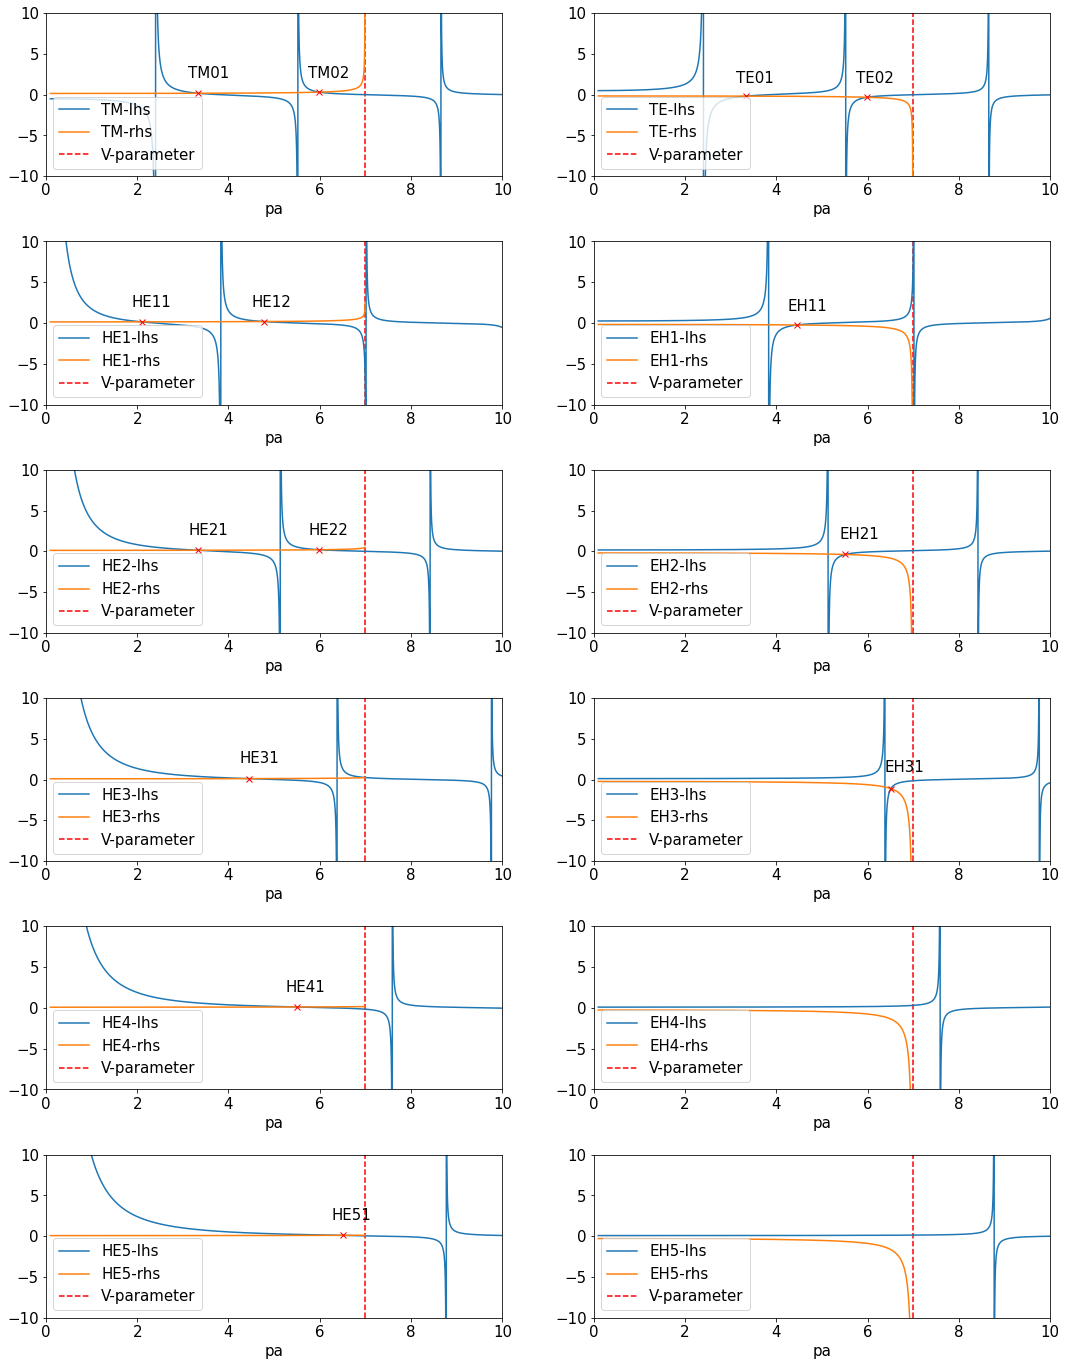

In [2]:
#defining functions to find modes
plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(6,2,figsize=(18, 24))
pa_points2 = np.linspace(0.1,10,10000)
pa_points = np.linspace(0.1,V,10000)

def f1(x,m,sign):# when sign=-1 TE and EH, when sign =1 TM HE
    return jv(m-sign,x)/(x*jv(m,x))
def f2(x,m,sign):
    x =  np.sqrt(V**2-x**2)
    return sign*kv(m-sign,x)/(x*kv(m,x))

## solution to func with sign=+1 corresponds to TM or HE modes
## solution to func with sign=-1 corresponds to TE or EH modes

####ploting graphs:
#ploting func 1 as lhs
axes[0,0].plot(pa_points2,f1(pa_points2,0,1),label='TM-lhs')
axes[0,1].plot(pa_points2,f1(pa_points2,0,-1),label='TE-lhs')
axes[1,0].plot(pa_points2,f1(pa_points2,1,1),label='HE1-lhs')
axes[1,1].plot(pa_points2,f1(pa_points2,1,-1),label='EH1-lhs')
axes[2,0].plot(pa_points2,f1(pa_points2,2,1),label='HE2-lhs')
axes[2,1].plot(pa_points2,f1(pa_points2,2,-1),label='EH2-lhs')
axes[3,0].plot(pa_points2,f1(pa_points2,3,1),label='HE3-lhs')
axes[3,1].plot(pa_points2,f1(pa_points2,3,-1),label='EH3-lhs')
axes[4,0].plot(pa_points2,f1(pa_points2,4,1),label='HE4-lhs')
axes[4,1].plot(pa_points2,f1(pa_points2,4,-1),label='EH4-lhs')
axes[5,0].plot(pa_points2,f1(pa_points2,5,1),label='HE5-lhs')
axes[5,1].plot(pa_points2,f1(pa_points2,5,-1),label='EH5-lhs')

#plotting func 2 as rhs
axes[0,0].plot(pa_points,f2(pa_points,0,1),label='TM-rhs')#m=0 
axes[0,1].plot(pa_points,f2(pa_points,0,-1),label='TE-rhs')#
axes[1,0].plot(pa_points,f2(pa_points,1,1),label='HE1-rhs')
axes[1,1].plot(pa_points,f2(pa_points,1,-1),label='EH1-rhs')
axes[2,0].plot(pa_points,f2(pa_points,2,1),label='HE2-rhs')
axes[2,1].plot(pa_points,f2(pa_points,2,-1),label='EH2-rhs')
axes[3,0].plot(pa_points,f2(pa_points,3,1),label='HE3-rhs')
axes[3,1].plot(pa_points,f2(pa_points,3,-1),label='EH3-rhs')
axes[4,0].plot(pa_points,f2(pa_points,4,1),label='HE4-rhs')
axes[4,1].plot(pa_points,f2(pa_points,4,-1),label='EH4-rhs')
axes[5,0].plot(pa_points,f2(pa_points,5,1),label='HE5-rhs')
axes[5,1].plot(pa_points,f2(pa_points,5,-1),label='EH5-rhs')

# labeling graphs for 6x2 axes
for i in range(6):
    for j in range(2):
        #axes[i,j].axvline(V, color='r', label='V')
        axes[i,j].vlines(V, -10, 10, linestyles='dashed', colors='red', label='V-parameter')
        axes[i,j].legend(loc='lower left')
        axes[i,j].set(xlabel='pa')
        axes[i,j].axis([0, 10, -10, 10])

# Change the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

# Finding all indices of intersections (including asymptotes and V lines) for 12 axes
idx = []
order = 0
for i in range(0,11):
    # Reverse the 'sign' for TE/EH (sign = -1) and TM/HE modes (sign = 1)
    sign = (-1)**i
    # Increase m = 0 to m = 5
    if i == 0:
        order = 0
    elif i % 2 == 0: # Each m has two subplots
        order += 1
    # First it calculates f1 - f2 and the corresponding signs using np.sign.
    # Applying np.diff reveals all the positions, where the sign changes (e.g. the lines cross).
    # Using np.argwhere gives us the exact indices.
    idx += [np.argwhere(np.diff(np.sign(f1(pa_points,order,sign) - f2(pa_points,order,sign)))).flatten()]

# Graphically choose the correct indices of intersections for 12 axes
pa_index = [[idx[0][1],idx[0][3]], # TM01 & TM02
            [idx[1][1],idx[1][3]], # TE01 & TE02
            [idx[2][0],idx[2][2]], # HE11 & HE12
            [idx[3][1]],           # EH11
            [idx[4][0],idx[4][2]], # HE21 & HE22
            [idx[5][1]],           # EH21
            [idx[6][0]],           # HE31
            [idx[7][1]],           # EH31
            [idx[8][0]],[],        # HE41
            [idx[10][0]],[]]       # HE51

# Calculate bete from beta^2 = (n_1k_1)^2-p^2
def findbeta(pa):
    return np.sqrt((n_1 * k0)**2 - (pa / a)**2)

# Plot all intersection points:
ax = [axes[0,0],axes[0,1],axes[1,0],axes[1,1],axes[2,0],axes[2,1],axes[3,0],axes[3,1],axes[4,0],axes[4,1],axes[5,0],axes[5,1]]
labels = [['TM01','TM02'],['TE01','TE02'],['HE11','HE12'],['EH11','EH12'],['HE21','HE22'],['EH21','EH22'],
          ['HE31','HE32'],['EH31','EH32'],['HE41','HE42'],['EH41','EH42'],['HE51','HE52'],['EH51','EH52']]

betas = []
pa_vals = []
order = 0
count = 0
no_sol = 0
# Annotation postion, (0,0) means unused
pos = [[(3.125,2),(5.75,2)],[(3.125,1.5),(5.75,1.5)],[(1.875,2),(4.5,2)],[(4.25,1.5),(0,0)],[(3.125,2),(5.75,2)],
       [(5.375,1.5),(0,0)],[(4.25,2),(0,0)],[(6.375,1),(0,0)],[(5.25,2),(0,0)],[(0,0),(0,0)], [(6.25,2),(0,0)], [(0,0),(0,0)]]

for axcount,label,index,pos,i in zip(ax,labels,pa_index,pos,range(0,11)):
    # Reverse the 'sign' for TE/EH (sign = -1) and TM/HE modes (sign = 1)
    sign = (-1)**i
    # Increase m = 0 to m = 5
    if i == 0:
        order = 0
    elif i % 2 == 0: # Each m has two subplots
        order += 1
    if len(index) == 0: #
        no_sol += 1
    else:
        #plot first point
        axcount.plot(pa_points[index[0]],f1(pa_points[index[0]],order,sign),'xr')
        axcount.annotate(label[0], xy=(2, 0), xytext=pos[0]) 
        betas += [findbeta(pa_points[index[0]])]
        pa_vals += [pa_points[index[0]]]

    #second point exits
    if len(index) == 2:
        axcount.plot(pa_points[index[1]],f1(pa_points[index[1]],order,sign),'xr')
        axcount.annotate(label[1], xy=(0, 0), xytext=pos[1])
        betas += [findbeta(pa_points[index[1]])]
        pa_vals += [pa_points[index[1]]]
print(pa_vals)
print(betas)
plt.show() 

## 3.(b) Print results of 'pa', 'qa', '$\beta$', '$n_{eff}$' for all modes.

After finding 'pa' of all modes, $qa$ is given by $$qa = \sqrt{V^2-(pa)^2}$$

$\beta$ can be found by $$\beta = \sqrt{n_1^2k_0^2 - (\frac{pa}{a})^2}$$

where $k_0 = 2\pi/\lambda$. And then $n_{eff}$ can be found by $$n_{eff} = \frac{\beta}{k_0}$$

In [3]:
# Print all results
def results(label,pa,qa,beta,neff):
    print(label, " mode: ")
    print("pa =", pa)
    print("qa =", qa)
    print('beta = %.4f' %beta)
    print('neff = %.4f' %neff)
    print()

labels=[['TM01'],['TM02'],
        ['TE01'],['TE02'],
        ['HE11'],['HE12'],
        ['EH11'],
        ['HE21'],['HE22'],
        ['EH21'],
        ['HE31'],
        ['EH31'],
        ['HE41'],
        ['HE51']]

for i,j,label in zip(pa_vals,betas,labels):
    qa_val=np.sqrt(V**2-i**2)
    neff_val= j/k0
    results(label,i,qa_val,j,neff_val)

['TM01']  mode: 
pa = 3.3351816005640136
qa = 6.146365875948072
beta = 11738140.0403
neff = 1.5132

['TM02']  mode: 
pa = 5.99060873147656
qa = 3.6074723583301984
beta = 11620343.4056
neff = 1.4980

['TE01']  mode: 
pa = 3.3351816005640136
qa = 6.146365875948072
beta = 11738140.0403
neff = 1.5132

['TE02']  mode: 
pa = 5.99060873147656
qa = 3.6074723583301984
beta = 11620343.4056
neff = 1.4980

['HE11']  mode: 
pa = 2.099153343625749
qa = 6.670442641212387
beta = 11769888.0198
neff = 1.5173

['HE12']  mode: 
pa = 4.768367738977093
qa = 5.1150678290363
beta = 11683043.2197
neff = 1.5061

['EH11']  mode: 
pa = 4.454018109772493
qa = 5.391008483352471
beta = 11696820.7619
neff = 1.5079

['HE21']  mode: 
pa = 3.3351816005640136
qa = 6.146365875948072
beta = 11738140.0403
neff = 1.5132

['HE22']  mode: 
pa = 5.99060873147656
qa = 3.6074723583301984
beta = 11620343.4056
neff = 1.4980

['EH21']  mode: 
pa = 5.5073651128966805
qa = 4.309313089461959
beta = 11646877.2652
neff = 1.5015

['HE31']

## 3.(c) Summarise the results as a table.

| Mode      | pa                 | qa                 | $\beta$       | $n_{eff}$ |
|-----------|--------------------|--------------------|---------------|-----------|
| $TM_{01}$ | 3.3351816005640136 | 6.146365875948072  | 11738140.0403 | 1.5132    |
| $TM_{02}$ | 5.99060873147656   | 3.6074723583301984 | 11620343.4056 | 1.4980    |
| $TE_{01}$ | 3.3351816005640136 | 6.146365875948072  | 11738140.0403 | 1.5132    |
| $TE_{02}$ | 5.99060873147656   | 3.6074723583301984 | 11620343.4056 | 1.4980    |
| $HE_{11}$ | 2.099153343625749  | 6.670442641212387  | 11769888.0198 | 1.5173    |
| $HE_{12}$ | 4.768367738977093  | 5.1150678290363    | 11683043.2197 | 1.5061    |
| $EH_{11}$ | 4.454018109772493  | 5.391008483352471  | 11696820.7619 | 1.5079    |
| $HE_{21}$ | 3.3351816005640136 | 6.146365875948072  | 11738140.0403 | 1.5132    |
| $HE_{22}$ | 5.99060873147656   | 3.6074723583301984 | 11620343.4056 | 1.4980    |
| $EH_{21}$ | 5.5073651128966805 | 4.309313089461959  | 11646877.2652 | 1.5015    |
| $HE_{31}$ | 4.454018109772493  | 5.391008483352471  | 11696820.7619 | 1.5079    |
| $EH_{31}$ | 6.509009874375375  | 2.556176880625344  | 11589322.7259 | 1.4940    |
| $HE_{41}$ | 5.5073651128966805 | 4.309313089461959  | 11646877.2652 | 1.5015    |
| $HE_{51}$ | 6.509009874375375  | 2.556176880625344  | 11589322.7259 | 1.4940    |

**Conclusion of these modes: As each HE and EH mode has two degenerate modes (in orthogonal directions), there are 24 modes in total, which consist of 20 EH/HE modes and 4 TE/TM modes. This result is consistent with the estimation $n=V^2/2 \approx 24.5$.**

In [4]:
4*V**2/(np.pi**2)

19.818930041152274

## 4. Excluding the fundamental mode {HE11/LP01}, pick one of the "HE41" mode for the tasks below

In [5]:
# Plotting e field for one mode
# Input values for the choosen mode: EH31
# pa = 6.509009874375375
# qa = 2.556176880625344
# beta = 11589322.7259
# neff = 1.4940
# m=3
#HE 41
pa = 5.5073651128966805
qa = 4.309313089461959
beta = 11646877.2652
neff = 1.5015
m=4

q=qa/a
p=pa/a

e0= 8.854188*10**(-12) # Permittivity in vacuum
u0=1.2566*10**(-6) # Permeability in vacuum
w=2*np.pi*(3*10**8)/(8.1*10**(-7)) # Angular freqeuncy  

## 5.(a) Find A, B, C, D by fixing one of the A or B parameters, e.g. to unity, and use the relevant equations to calculate the other values.

By setting $A$ or $B = 1$, $A$, $B$, $C$ and $D$ are obtained from
$$\frac{C}{A}=\frac{J_m(pa)}{K_m(pa)}$$

$$\frac{D}{B}=\frac{J_m(pa)}{K_m(pa)}$$

$$A \left [\frac{i\beta m}{\omega \mu_0}\left (\frac{1}{(pa)^2}+\frac{1}{(qa)^2} \right) \right ] = B \left [\frac{J'_m(pa)}{paJ_m(pa)}+\frac{K'_m(qa)}{qaK_m(qa)}\right]$$

$$A \left [\frac{i\beta m}{\omega \epsilon_0}\left (\frac{1}{(pa)^2}+\frac{1}{(qa)^2} \right) \right ] = -A \left [n_1^2\frac{J'_m(pa)}{paJ_m(pa)}+n_2^2\frac{K'_m(qa)}{qaK_m(qa)}\right]$$

where $$J'_m(pa) = \mp J_{m\pm 1}(pa) \pm \frac{m}{pa}J_m(pa)$$ and $$K'_m(pa) = - K_{m\pm 1}(pa) \pm \frac{m}{pa}K_m(pa)$$

In [6]:
## For TE want A=C=0 so use ABCD func to plot field
##     TM want B=D=0 so use a different function where A=1 and solve for ACD
##     HE and EH will have two degenerate solutions one with B=1 and one with A=1

def ABCD(V,m,pa,qa,beta): # Calculates ABCD to find TE or HE modes (A=C=0 or B>A)
    B = 1 # Set this to unity

    # Finding A:
    J_prime = -sp.special.jv(m+1,pa)+ (m/pa)*sp.special.jv(m,pa) 
    K_prime = -sp.special.kv(m+1,qa)+ (m/qa)*sp.special.kv(m,qa) 
    #one solution- either TE or the first solution of HE
    x1 = (1j*beta*m/(e0*w)) * (1/(pa**2)+1/(qa**2))
    x2 = n_1**2*(J_prime)/(pa*sp.special.jv(m,pa)) + n_2**2*(K_prime)/(qa*sp.special.kv(m,qa))
    A = -x1/x2
    #other solution for second HE mode degernate to first HE solution
    # x1= (1j*beta*m*(1/(pa**2)+1/(qa**2)))/(e0*w) 
    # x2= (J_prime)/(pa*sp.special.jv(m,pa)) + (K_prime)/(qa*sp.special.kv(m,qa))
    # A= x2/x1
    
    # Finding D:
    D = (sp.special.jv(m,pa)/sp.special.kv(m,qa))*B   
    # Finding C:
    C = (sp.special.jv(m,pa)/sp.special.kv(m,qa))*A
    return A,B,C,D
    
A,B,C,D = ABCD(V,m,pa,qa,beta)
print("A = ",A)
print("B = ",B)
print("C = ",C)
print("D = ",D)

A =  (-0+254.2007333654904j)
B =  1
C =  (-0+2539.472057302902j)
D =  9.990026479001708


## 5.(b) Define the function of {radial, tangential, z} E-field components.

Once $A$, $B$, $C$ and $D$ are known, the general mode solutions inside the fibre core are

$$E_z(r\le a) = AJ_m(pr)$$

$$E_r(r\le a) = -\frac{i\beta}{p^2} \left(ApJ'_m(pr) + i\omega \frac{\mu_0 m}{\beta r}BJ_m(pr) \right )$$

$$E_\phi(r\le a) = -\frac{i\beta}{p^2} \left( \frac{im}{r} AJ_m(pr) - \omega \frac{\mu_0}{\beta}pBJ'_m(pr) \right )$$

and the general mode solutions inside the fibre cladding are

$$E_z(r>a) = CK_m(qr)$$

$$E_r(r>a) = \frac{i\beta}{q^2} \left(CqK'_m(qr) + i\omega \frac{\mu_0 m}{\beta r}DK_m(qr) \right )$$

$$E_\phi(r>a) = \frac{i\beta}{q^2} \left( \frac{im}{r} CK_m(qr) - \omega \frac{\mu_0}{\beta}qDK'_m(qr) \right )$$

In [7]:
# E field in polar coords- for TEM modes
def Ezp(r):
    if r < a: # In core
        return A * sp.special.jv(m,p*r)
    else: # In clad
        return C * sp.special.kv(m,q*r)
def Er(r):
    if r < a:# In core
        J_diff = -sp.special.jv(m+1,p*r)+(m/(p*r))*sp.special.jv(m,p*r)
        return (-1j*beta/(p**2))*(A*p*J_diff+1j*w*u0*m*B*sp.special.jv(m,p*r)/(beta*r))
    else:# In clad
        K_diff = -sp.special.kv(m+1,q*r)+(m/(q*r))*sp.special.kv(m,q*r)
        return (1j*beta/(q**2))*(C*q*K_diff+1j*w*u0*m*D*sp.special.kv(m,q*r)/(beta*r)) 
def Ephi(r):
    if r < a:# In core
        J_diff = -sp.special.jv(m+1,p*r)+(m/(p*r))*sp.special.jv(m,p*r)
        return (-1j*beta/(p**2))*(1j*m*A*sp.special.jv(m,p*r)/r-w*u0*p*B*J_diff/(beta))
    else: # In clad
        K_diff = -sp.special.kv(m+1,q*r)+(m/(q*r))*sp.special.kv(m,q*r)
        return (1j*beta/(q**2))*(1j*m*C*sp.special.kv(m,q*r)/r-w*u0*q*D*K_diff/(beta))

## 6.(a) Define spatial distribution of the total intensity of the mode in the direction perpendicular to the fibre axis, e.g. sum of the square modulus of the field in the {radial, tangential} directions.

The intensity is given by $$I = (|E_r(r)|^2 + |E_\phi(r)|^2)$$

In [8]:
#2d plots

a= 3*10**(-6) # real size
# a=1 # Normalised core
X = np.linspace(-(a+5*10**(-7)), a+5*10**(-7), 128)# Mainly core with some clad around
Y ,Z = X,X # Give Y and Z same length- symmetric
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2) 

# Polar coords for plotting TEM  modes
Er_vals,Ephi_vals,Ezp_vals=[],[],[]
for i in R:
    Er_vals_sub,Ephi_vals_sub,Ezp_vals_sub=[],[],[]
    for i2 in i:
        Ezp_vals_sub+= [Ezp(i2)] 
        Er_vals_sub+= [Er(i2)]
        Ephi_vals_sub+= [Ephi(i2)]
    Ezp_vals+= [Ezp_vals_sub]
    Er_vals+= [Er_vals_sub]
    Ephi_vals+= [Ephi_vals_sub]    

phi= np.arctan(X/Y)
extra_phase_sq= np.cos((m*phi-beta*Z))**2 +np.sin((m*phi-beta*Z))**2 #*extra_phase_sq
Ip= np.array((Er_vals*np.conj(Er_vals)+Ephi_vals*np.conj(Ephi_vals)).real)*3*10**(8)*e0/2 

## 6.(b) Plot maps in the plane perpendicular to the fibre axis of the amplitude of all three E-fields {$E_r$, $E_\phi$, $E_z$} within the fibre. Also plot the spatial distribution of the total intensity $I$.

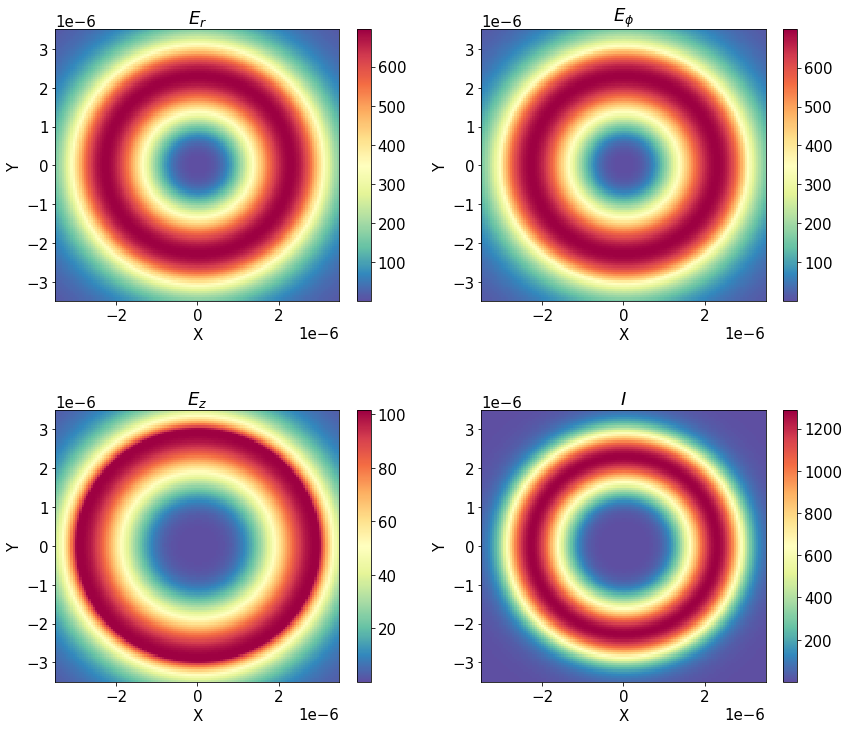

In [15]:
fig,axes = plt.subplots(ncols=2, nrows=2, figsize=(14,12))
cm=plt.cm.get_cmap('Spectral_r')

# radial coords plots for TEM
# Plotting real part
im1 = axes[0][0].pcolormesh(X, Y, np.array(Er_vals).real, cmap=cm)
# im2 = axes[0][1].pcolormesh(X, Y, np.array(Ephi_vals).real, cmap=cm)
# im3 = axes[1][0].pcolormesh(X, Y, np.array(Ezp_vals).real, cmap=cm)
# im4 = axes[1][1].pcolormesh(X, Y, Ip, cmap=cm)

# # Plotting imaginary part
#im1 = axes[0][0].pcolormesh(X, Y, np.array(Er_vals).imag, cmap=cm)
im2 = axes[0][1].pcolormesh(X, Y, np.array(Ephi_vals).imag, cmap=cm)
im3 = axes[1][0].pcolormesh(X, Y, np.array(Ezp_vals).imag, cmap=cm)
im4 = axes[1][1].pcolormesh(X, Y, Ip, cmap=cm)

axes[0][0].set_title(r"$E_r$")
axes[0][1].set_title(r"$E_{\phi}$")
axes[1][0].set_title(r"$E_z$")
axes[1][1].set_title(r"$I$")
for ax in [axes[0][0],axes[0][1],axes[1][0],axes[1][1]]:
    ax.set(ylabel='Y', xlabel='X')

fig.colorbar(im1, ax=axes[0, 0])
fig.colorbar(im2, ax=axes[0, 1])
fig.colorbar(im3, ax=axes[1, 0])
fig.colorbar(im4, ax=axes[1, 1])

# Change the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

## 7. Calculate numerically the waveguide dispersion $D_w$ for the mode selected.

The waveguide dispersion is given by $$D_w = -\frac{\lambda}{c} \left[\frac{\partial ^2 n_{eff}}{\partial \lambda ^2} \right]_w$$

Since our system is discrete, the second derivative should be modified as
$$\frac{\partial ^2 n}{\partial \lambda ^2} = \frac{[n(\lambda + \Delta \lambda) - n(\lambda)]/ \Delta \lambda
-[n(\lambda) - n(\lambda - \Delta \lambda)]/ \Delta \lambda}{\Delta \lambda} = \frac{n(\lambda + \Delta \lambda) - 2 n(\lambda) + n(\lambda - \Delta \lambda)}{(\Delta \lambda)^2}$$

In [18]:
# Calculating dispersion
lamda_0 = 809.9999e-9      # Wavelength, unit is [m]
lamda_1 = 810e-9
lamda_2 = 810.0001e-9
k_0 = 2 * np.pi / lamda_0  # Wave number, unit is [m^-1]
k_1 = 2 * np.pi / lamda_1
k_2 = 2 * np.pi / lamda_2
neff_0 = beta / k_0        # Effective refractive index, no unit
neff_1 = beta / k_1
neff_2 = beta / k_2

D = -lamda_1/3e8*(neff_2 - 2*neff_1 + neff_0)/(lamda_0-lamda_1)**2 # Waveguide dispersion, unit is s/m^2
D = D * 10**6 # Waveguide dispersion, unit is ps/(nm km)

print('The waveguide dispersion Dw = %.4f'%D,'ps/(nm km)')

The waveguide dispersion Dw = -59.9520 ps/(nm km)


## 8. Using your result to part 6, calculate the fraction of energy in the core and cladding by summing over the relevant regions.

The fraction of energy in the core and cladding are calculated by

$$\Gamma(V)=\sum_{i^2+j^2 \le a^2} I_{ij}x_{ij}y_{ij}$$

$$1-\Gamma(V)=\sum_{i^2+j^2>a^2} I_{ij}x_{ij}y_{ij}$$

And alternative Rudolph-Neumann approximation method (simple empirical formula) is given by

$$\Gamma(V) \approx \left(1.1428 - \frac{0.996}{V} \right)^2$$

An approximate value for the effective index can be estimated in both methods above by $$n_{eff}^2 \approx n_1^2\Gamma(V) + n_2^2(1-\Gamma(V))$$


In [11]:
# Find energy in core and clad
energy_Core=0
energy_Clad=0

vals=range(0,len(X))
for i in vals:
    for j in vals:
        if i<a and j<a:# In core
            energy_Core+= Ip[i][j]*X[i,j]*Y[i,j] #energy= I A #assuming no time involved
        else: # In clad
            # Print('y')
            energy_Clad+= Ip[i][j]*X[i,j]*Y[i,j]
print('The fraction of energy in the core and cladding is',energy_Core,'J ', 'and', energy_Clad,'J ')
#Calcualting approximate neff value using energy from intensity plots

neff_approx = (n_1**2*energy_Core+ n_2**2*(1-energy_Core))**0.5

#using Rudolph-Neumann approximation method
A_RN=1.1428
B_RN=0.996
energy_Core_approx= (A_RN-B_RN/V)
neff_approx_RN= (n_1**2*energy_Core_approx+ n_2**2*(1-energy_Core_approx))**0.5


print('Using intensity plots: The approximate value for the effective index is ',neff_approx)
print('Using Rudolph-Neumann approximation: The approximate value for the effective index is ',neff_approx_RN)
print('The value for the effective index is ',neff)

The fraction of energy in the core and cladding is 6.297830465809486e-12 J  and -6.2978304663030415e-12 J 
Using intensity plots: The approximate value for the effective index is  1.490000000000191
Using Rudolph-Neumann approximation: The approximate value for the effective index is  1.520011011026276
The value for the effective index is  1.5015


The value of this effective index is approximately the same as the value calculated directly from the intersection, which is in line with the expected value.